Import necessary packages

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="whitegrid") # set the background for the graphs

In [3]:
#Reading the csv file cardiogoodfitness.csv in variable 
data=pd.read_csv("data/CardioGoodFitness.csv")

In [4]:
#Examine the data by looking at the first 5 rows of the data
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Kilometres
0,TM195,18,Male,14,Single,3,4,29562,180.208
1,TM195,19,Male,15,Single,2,3,31836,120.675
2,TM195,19,Female,14,Partnered,4,3,30699,106.194
3,TM195,19,Male,12,Single,3,3,32973,136.765
4,TM195,20,Male,13,Partnered,4,2,35247,75.623


In [5]:
data.shape

(180, 9)

Observation : There are 180 rows and 9 columns in the dataset

In [6]:
#get the type of data in dataframe
data.dtypes

Product           object
Age                int64
Gender            object
Education          int64
MaritalStatus     object
Usage              int64
Fitness            int64
Income             int64
Kilometres       float64
dtype: object

Observation:

- Product, Gender and Martial status are string datatype 
- Age, Education, Usage, Fitness, Income, Miles are integer datatype.

# Data Preprocessing

In [8]:
#changing it to  object dtype to category  to save memory
data.Product=data["Product"].astype("category")
data.Gender=data["Gender"].astype("category")
data.MaritalStatus=data["MaritalStatus"].astype("category")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Kilometres     180 non-null    float64 
dtypes: category(3), float64(1), int64(5)
memory usage: 9.5 KB


In [10]:
#What are the different column name?
data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Kilometres'],
      dtype='object')

In [11]:
# Are there any missing values?
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Kilometres       0
dtype: int64

In [12]:
#Are there any duplicate values?
data.duplicated().sum()

0

Observation: There are no missing or duplicate values in the dataset

In [13]:
data.describe()

,Age,Education,Usage,Fitness,Income,Kilometres
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,166.039861
std,6.943498,1.617055,1.084797,0.958869,16506.684226,83.448540
min,18.000000,12.000000,2.000000,1.000000,29562.000000,33.789000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,106.194000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,151.246000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,184.632750
max,50.000000,21.000000,7.000000,5.000000,104581.000000,579.240000


Observation:

- Age of customer using treadmill is between range 18 - 50 . Average age is 28.78 and median is 26.
- Maximum income of treadmill user is 100K , Average income approx. 54K ,while median is is approx. 51K.
- Expected Treadmill usage is atleast Once a week , maximum is 7 times a week and on Average 3 times a week
- Customer education is between 12 -21 years, with average and median of 16 years and maximum of 21 years
- Customer expects to runs on an average of 166 km per week, median 151 km per week.
- Average self rated fitness is 3.

In [14]:
data.Product.value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

Observation: TM195 treadmill model is most sold model.

In [15]:
data.Gender.value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

Observation: There are More Male customers (104) who are buying treadmill than female customers (76)

In [16]:
data.MaritalStatus.value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

Observation: There are 107 Partnered and 73 single customers. Customers who are Partnered are buying treadmill more compared to single customer.

In [17]:
data[data['Product'] == 'TM195'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.550000,7.221452,18.000,23.000,26.000,33.000,50.000
Education,80.0,15.037500,1.216383,12.000,14.000,16.000,16.000,18.000
Usage,80.0,3.087500,0.782624,2.000,3.000,3.000,4.000,5.000
Fitness,80.0,2.962500,0.664540,1.000,3.000,3.000,3.000,5.000
Income,80.0,46418.025000,9075.783190,29562.000,38658.000,46617.000,53439.000,68220.000
Kilometres,80.0,133.205087,46.458430,61.142,106.194,136.765,151.246,302.492


Observation

- 80 customers bought TM195 model
- Average age of customer who purchases TM195 is 28.5 , Median is 26 . Data is right skewed.
- Average Education is 15 and median is 16.
- Expected usage is 3 day a week
- Expected kilometres to run is on an Average 133 km per week and median is 136.
- Average income and median is around 46K.

In [18]:
data[data['Product'] == 'TM498'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,60.0,28.900000,6.645248,19.000,24.000,26.000,33.250,48.000
Education,60.0,15.116667,1.222552,12.000,14.000,16.000,16.000,18.000
Usage,60.0,3.066667,0.799717,2.000,3.000,3.000,3.250,5.000
Fitness,60.0,2.900000,0.629770,1.000,3.000,3.000,3.000,4.000
Income,60.0,48973.650000,8653.989388,31836.000,44911.500,49459.500,53439.000,67083.000
Kilometres,60.0,141.484733,53.520384,33.789,102.976,136.765,170.554,341.108


Observation

- 60 customers bought TM498 model
- Average age of customer who purchases TM498 is 28.9 , Median is 26 . Customer range is between 24-33.
- Average Education is 15 and median is 16.
- Expected usage is 3 day a week
- Expected kilometres to run is on an Average 141 km per week and median is 136.
- Average Income is 48973. Median Income is 49459

In [19]:
data[data['Product'] == 'TM798'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,40.0,29.1000,6.971738,22.00,24.75,27.00,30.25,48.00
Education,40.0,17.3250,1.639066,14.00,16.00,18.00,18.00,21.00
Usage,40.0,4.7750,0.946993,3.00,4.00,5.00,5.00,7.00
Fitness,40.0,4.6250,0.667467,3.00,4.00,5.00,5.00,5.00
Income,40.0,75441.5750,18505.836720,48556.00,58204.75,76568.50,90886.00,104581.00
Kilometres,40.0,268.5421,96.647070,128.72,193.08,257.44,321.80,579.24


Observation

- 40 customers bought TM195 model
- Average age of customer who purchases TM195 is 29.1 , Median is 27 . Data is right skewed.
- Average Education is 17 and median is 18.
- Expected usage is 4 day a week
- Expected kilometres to run is on an Average 268 km per week and median is 257.
- Average Income is 75K and median is 76K

# Visualize the Data to get more insights
## Univariate Analysis

In [1]:
def dist_box_violin(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig, axes =plt.subplots(1,3,figsize=(17, 7))
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.distplot(data,kde=False,color='Blue',ax=axes[0])
    axes[0].axvline(data.mean(), color='y', linestyle='--',linewidth=2)
    axes[0].axvline(data.median(), color='r', linestyle='dashed', linewidth=2)
    axes[0].axvline(data.mode()[0],color='g',linestyle='solid',linewidth=2)
    axes[0].legend({'Mean':data.mean(),'Median':data.median(),'Mode':data.mode()})
    sns.boxplot(x=data,showmeans=True, orient='h',color="purple",ax=axes[1])
    #just exploring violin plot
    sns.violinplot(data,ax=axes[2],showmeans=True)

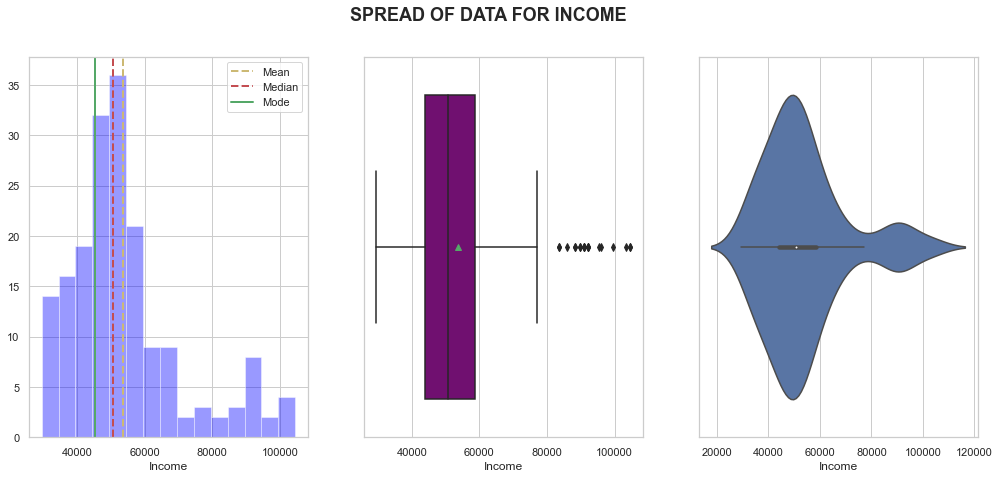

In [21]:
dist_box_violin(data.Income)

Observations:

- Income is skewed towards right , Median is 50K , Mean is 55k and mode is $45K.
- Most of the customers are in lower pay range and earn less than 70K.
- Income has some outliers. Few customers earn beyond 80K.

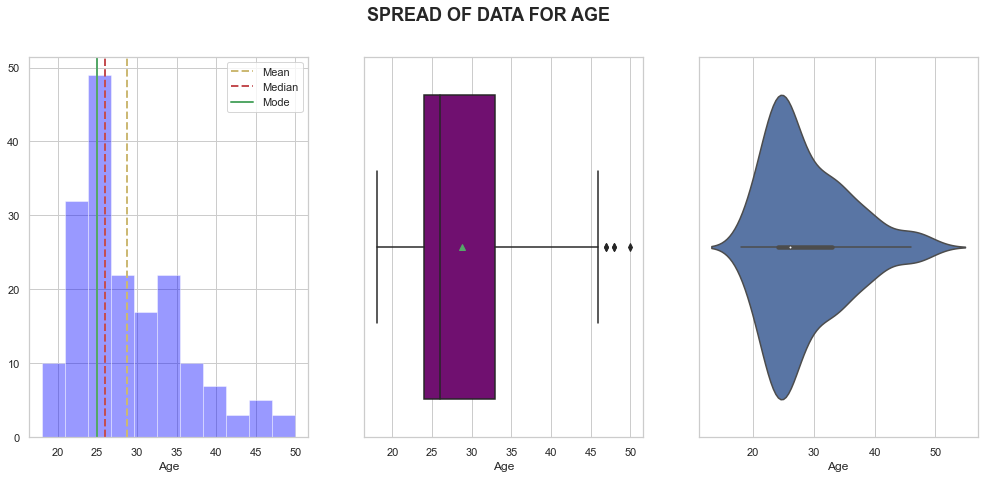

In [23]:
dist_box_violin(data.Age)

Observations:

- Age is skewed towards right.
- Customers buying treadmill are young and average age of customer is 28 , median is 26 and mode is 25
- Customers buying treadmill after age of 40 and before 20 are few.

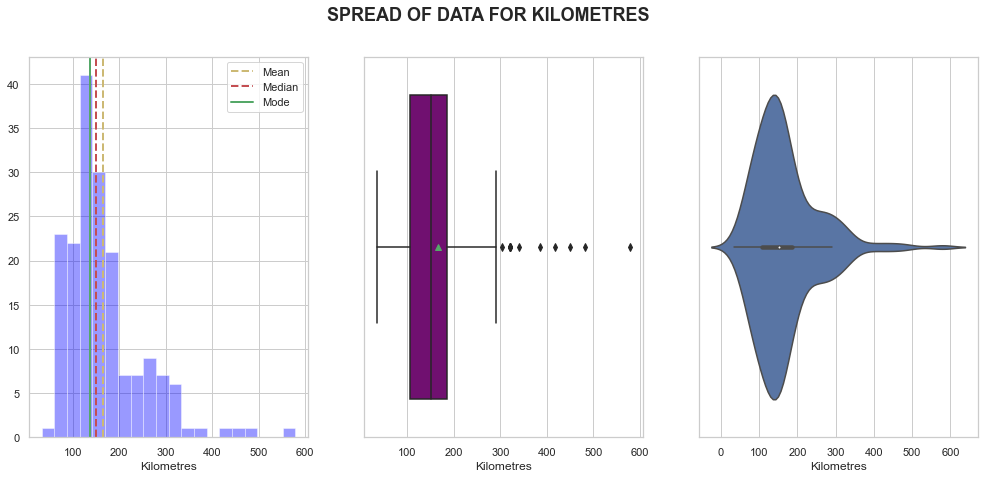

In [25]:
dist_box_violin(data.Kilometres)

Observations:

- Kilometres is skewed towards right.
- Customers expect to run on an average 160 km per week.
- There are some outliers, where customers are expecting to run more than 300 km per weak.

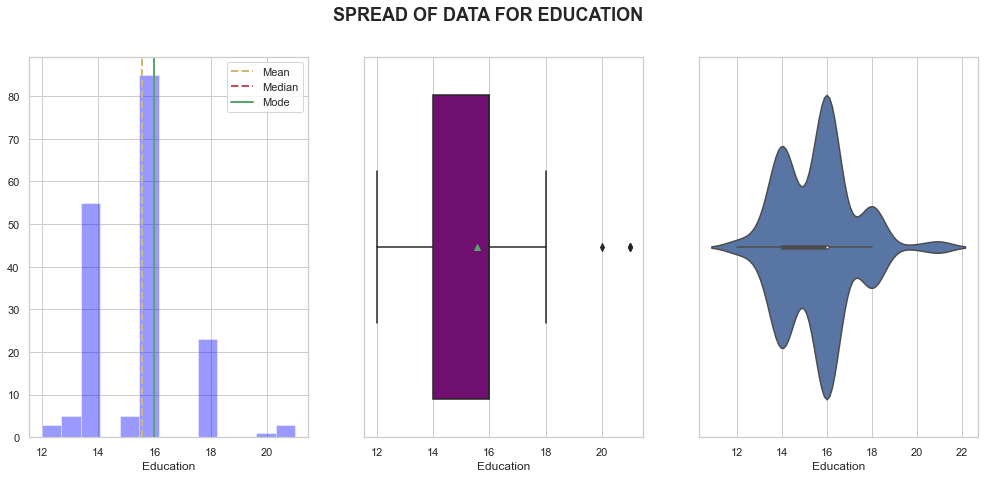

In [27]:
dist_box_violin(data.Education)

Observations

- Most of the customers have 16 year of education (assuming them to be college graduates or bachelors).
- There are few outliers.

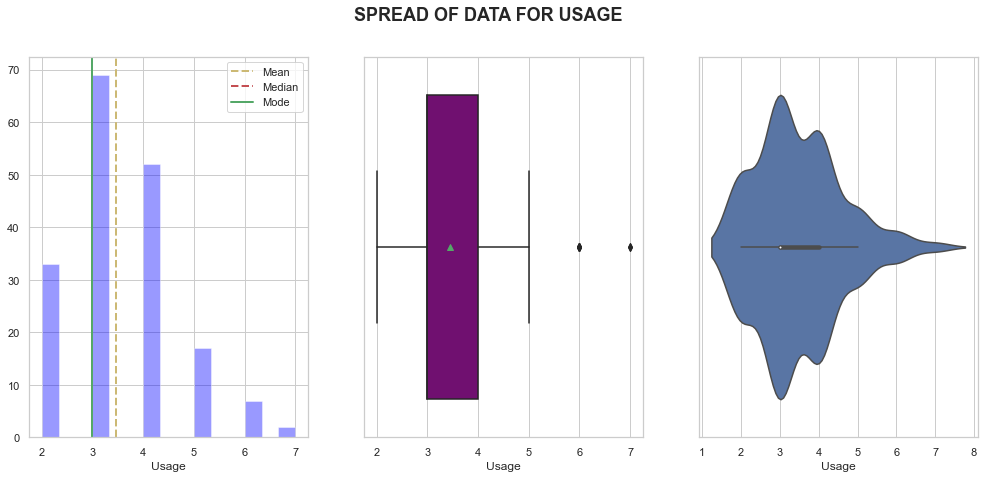

In [28]:
dist_box_violin(data.Usage)

Observations

- Most of customers expect they will be using the treadmill 3-4 days per week.
- There are few outliers where customer are expecting to use treadmill for 6 or 7 times a week

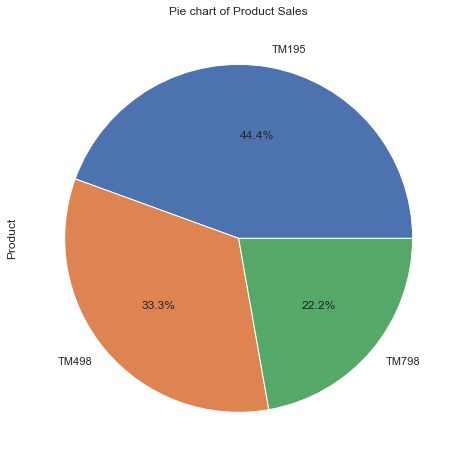

In [29]:
#Univariate Analysis
#categorical variables 
plt.figure(figsize=(14,7))
data['Product'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(8,8))
plt.title("Pie chart of Product Sales")
plt.show()

In [30]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage

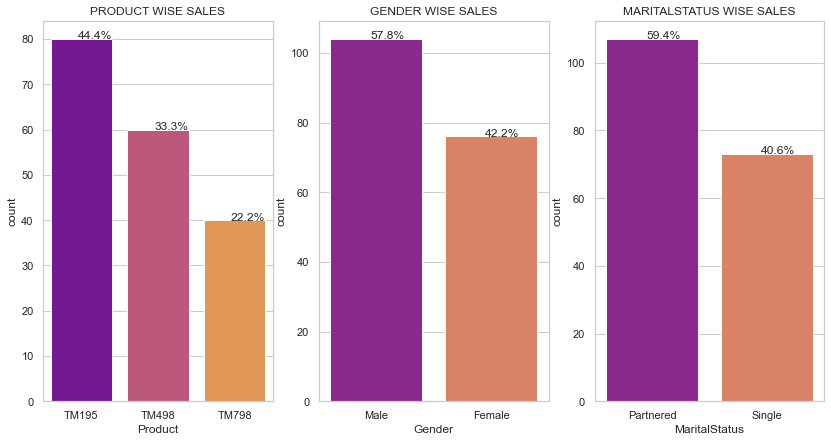

In [34]:
fig1, axes1 =plt.subplots(1,3,figsize=(14, 7))
list_col=['Product','Gender','MaritalStatus']
j=0
for i in range(len(list_col)):
    order = data[list_col[i]].value_counts(ascending=False).index # to display bar in ascending order
    axis=sns.countplot(x=list_col[i], data=data , order=order,ax=axes1[i],palette='plasma').set(title=list_col[i].upper() + ' WISE SALES')
    bar_perc(axes1[i],data[list_col[i]])

Observation:
    
- 44.4% customers brought TM195. TM195 model is the most purchased model. TM498 was purchased more than TM798.
- 57.8% male brought Treadmill.There are more Male customers than Female customers.
- 59.4% of the customers who purchased treadmill are Married.

## Bivariate analysis

In [35]:
#Average age of customer buying each model
data.groupby('Product')['Age'].mean()

Product
TM195    28.55
TM498    28.90
TM798    29.10
Name: Age, dtype: float64

In [36]:
#Average Income of customer buying each model
data.groupby('Product')['Income'].mean()

Product
TM195    46418.025
TM498    48973.650
TM798    75441.575
Name: Income, dtype: float64

In [38]:
#Average Kilometres of customer running in each model
data.groupby('Product')['Kilometres'].mean()

Product
TM195    133.205087
TM498    141.484733
TM798    268.542100
Name: Kilometres, dtype: float64

Gender   Female  Male
Product              
TM195        40    40
TM498        29    31
TM798         7    33


Text(0.5, 1.0, 'PRODUCT BY GENDER')

<Figure size 720x720 with 0 Axes>

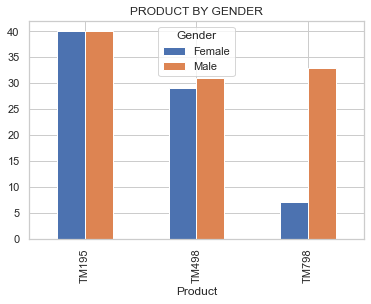

In [39]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(data['Product'],data['Gender'] )
print(prd_gender)

ax=prd_gender.plot(kind='bar')

plt.title("PRODUCT BY GENDER")

Observation

- TM195 model was equally bought my Male and Female
- There are slighly more males who TM498 model compared to female .
- TM798 model is more popular in Males than in female.

MaritalStatus  Partnered  Single
Product                         
TM195                 48      32
TM498                 36      24
TM798                 23      17


Text(0.5, 1.0, 'PRODUCT BY MARITAL STATUS')

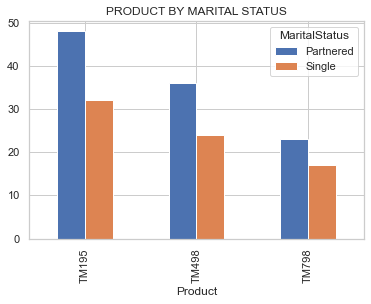

In [60]:
prd_mar_status=pd.crosstab(data['Product'],data['MaritalStatus'] )
print(prd_mar_status)
prd_mar_status.plot(kind='bar')
plt.title("PRODUCT BY MARITAL STATUS")

<AxesSubplot:>

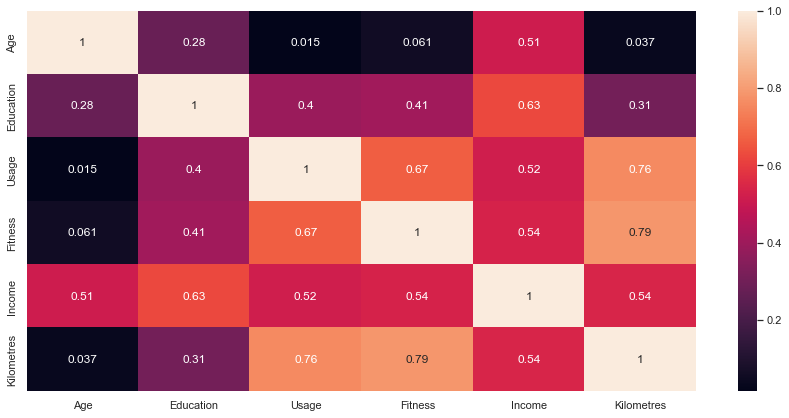

In [41]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True) 

In [42]:
corr_pairs = data.corr().unstack() # give pairs of correlation
print( corr_pairs[abs(corr_pairs)>0.5]) # Gives us correlated data

Age         Age           1.000000
            Income        0.513414
Education   Education     1.000000
            Income        0.625827
Usage       Usage         1.000000
            Fitness       0.668606
            Income        0.519537
            Kilometres    0.759130
Fitness     Usage         0.668606
            Fitness       1.000000
            Income        0.535005
            Kilometres    0.785702
Income      Age           0.513414
            Education     0.625827
            Usage         0.519537
            Fitness       0.535005
            Income        1.000000
            Kilometres    0.543473
Kilometres  Usage         0.759130
            Fitness       0.785702
            Income        0.543473
            Kilometres    1.000000
dtype: float64


Observation

- Age and Income has low correlation
- Education and Income has low correlation
- Fitness, Usage, and Kilometres are strongly correlated
- TM798 model is correlated to Education, Usage,Fitness, Income and Kilometres

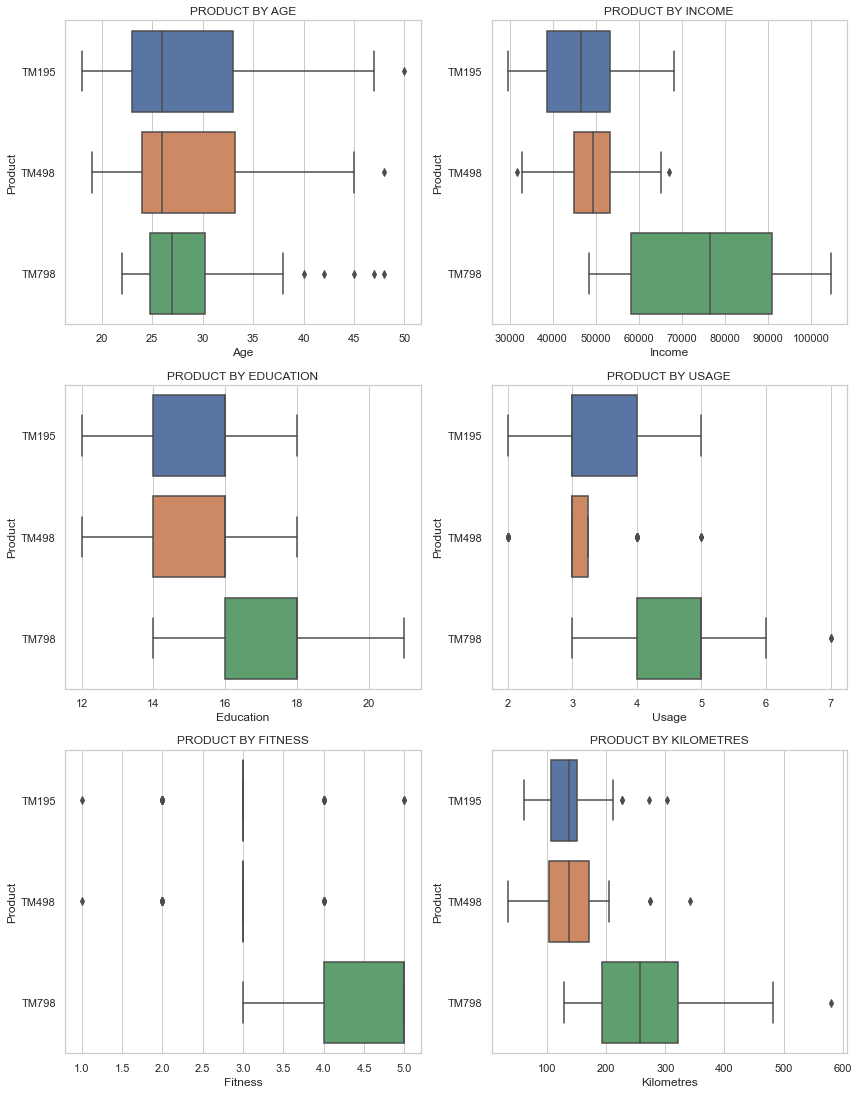

In [45]:
#Bivariate Analysis for 
#1.Product & Age
#2.Product & Income
#3.Product & Education
#4.Product & Usage
#5.Product & Fitness
#6.Product & Miles
fig1, axes1 =plt.subplots(3,2,figsize=(14, 19))
list1_col=['Age','Income','Education','Usage','Fitness','Kilometres']
#instead of writing  boxplot 6 times using for loop
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    
    sns.boxplot(data[list1_col[i]],data['Product'],ax=ax).set(title='PRODUCT BY ' + list1_col[i].upper()  )

Observations:

- There are many outliers for TM798 ,customers who are more than age of 40 .
- Age of customers buying TM195 and TM498 is between 20-35, whereas customers buying TM798 are primarily in 25-30
- Customers with higher income and more education have purchased TM798 model.
- Customers with lower income purchase TM195 and TM498 model likely due to the cost of the Treadmill
- Customer with TM195 expect to use treadmill 3-4 times a week and have average self rated fitness as 3.
- Customers who bought TM498 model expecting to use Treadmill less frequently but expecting to run the same kilometres as TM195 users a week.
- Customer buying TM798 plan to use it more frequently , run more kilometres and have high self rated fitness .They seem to be more health-conscious or professionals.

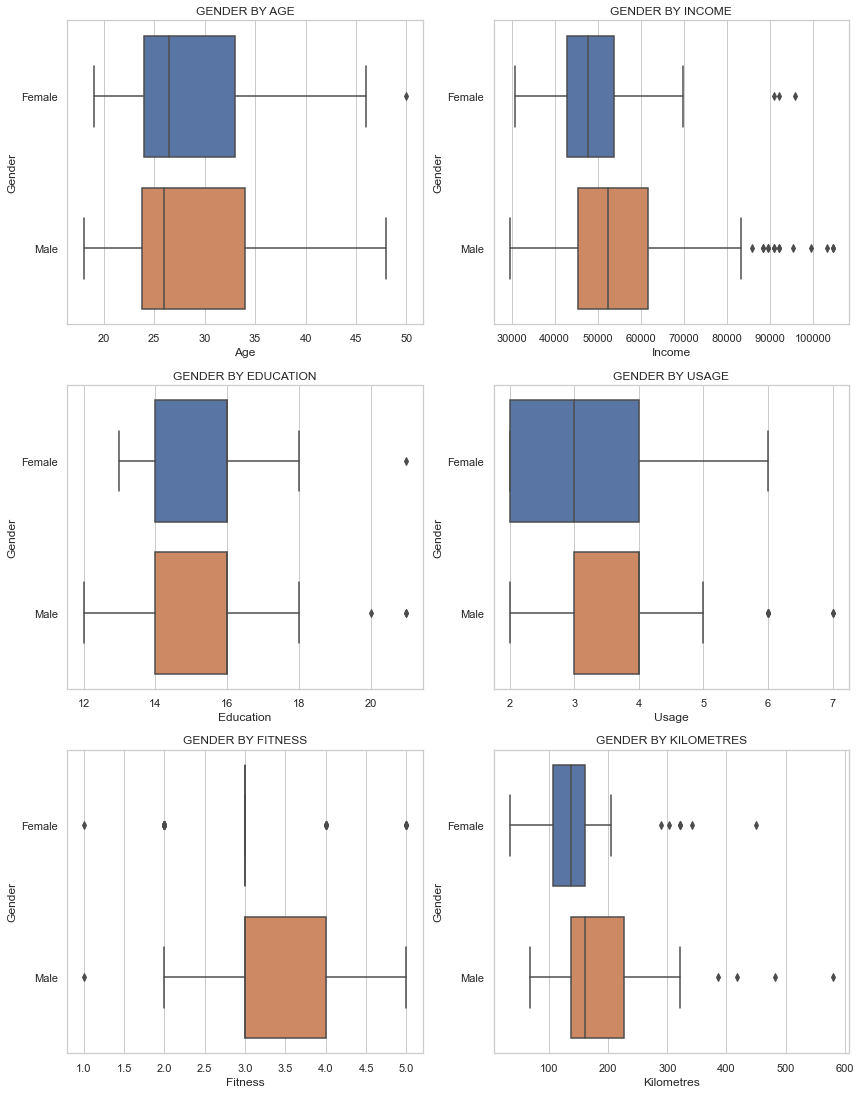

In [46]:
#Bivariate Analysis for 
#1.Gender & Age
#2.Gender & Income
#3.Gender & Education
#4.Gender & Usage
#5.Gender & Fitness
#6.Gender & Miles

fig1, axes1 =plt.subplots(3,2,figsize=(14, 19))
list1_col=['Age','Income','Education','Usage','Fitness','Kilometres']
# to plot graph side by side.
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(data[list1_col[i]],data['Gender'],ax=ax).set(title='GENDER BY ' + list1_col[i].upper()) 

Observations:

- Male customers earn slightly more than Female customers
- Males Customer have higher self rated fitness than female
- Males customers run more frequently and covered more kilometres than female customers
- Female and male who purchased the treadmill are in age range 23-33
- Education of Male and Female customers is the same

<Figure size 504x504 with 0 Axes>

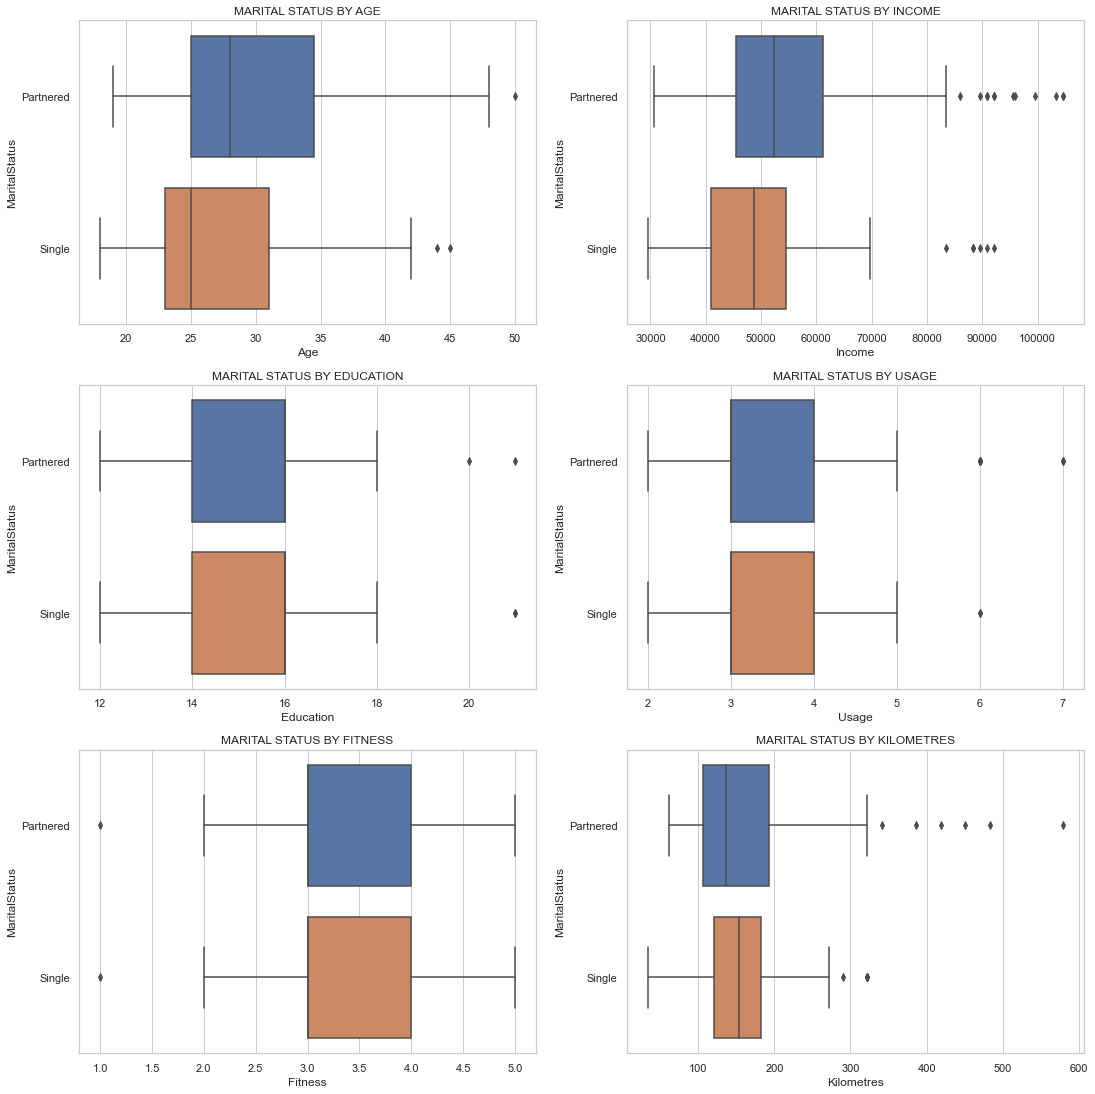

In [48]:
#Bivaraite Analysis for 
#1.Marital Status & Age
#2.Marital Status & Income
#3.Marital Status & Education
#4.Marital Status & Usage
#5.Marital Status & Fitness
#6.Marital Status & Miles
plt.figure(figsize=(7,7))
fig1, axes1 =plt.subplots(3,2,figsize=(18, 19))
list1_col=['Age','Income','Education','Usage','Fitness','Kilometres']
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(data[list1_col[i]],data['MaritalStatus'],ax=ax).set(title='MARITAL STATUS BY ' + list1_col[i].upper())

[Text(0.5, 1.0, 'MARITAL STATUS BY GENDER')]

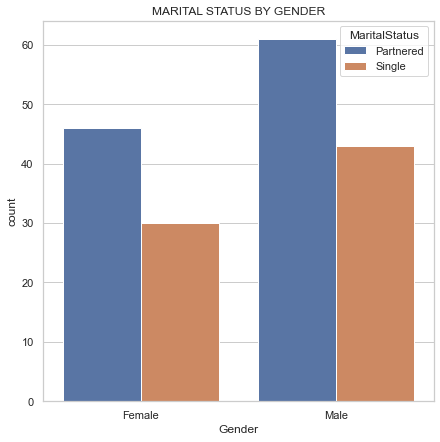

In [49]:
plt.figure(figsize=(7,7))
sns.countplot(data['Gender'],hue=data["MaritalStatus"]).set(title='MARITAL STATUS BY GENDER')

Observations:

- Partnered customer expects to run more kilometres compared to single
- Income of Partnered customer is more than income of single customer
- Partnered customer is older than single customer
- There are more single males buying Treadmill than single Females
- Self rated Fitness of both Partnered and Single customer are same
- Education of both Partnered and Single customer is same

## Multivariate Analysis

<Figure size 864x504 with 0 Axes>

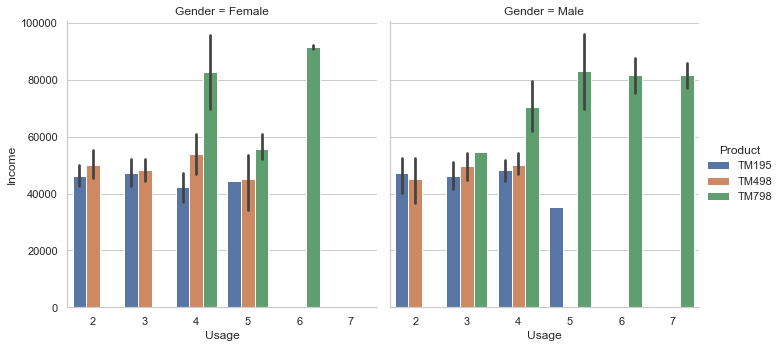

In [51]:
plt.figure(figsize=(12,7))
sns.catplot(x='Usage', y='Income', col='Gender',hue='Product' ,kind="bar", data=data)

Observations :

- Male customer with higher income ,bought TM798 Model and expect to use treadmill 4-6 /week
- Customer who bought TM195 and TM498 are in same income range and expect to use treadmill 3-4 /week

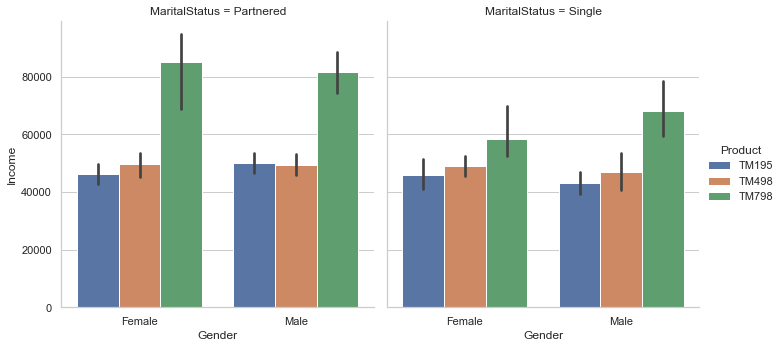

In [53]:
# Income by gender by product and by marital status
sns.catplot(x='Gender',y='Income', hue='Product', col='MaritalStatus', data=data,kind='bar');

In [54]:
prd_mar_gen= pd.crosstab(index=data["Product"], 
                             columns=[data["MaritalStatus"],
                                      data["Gender"]] ,
                             )  
prd_mar_gen

MaritalStatus Partnered      Single     
Gender           Female Male Female Male
Product                                 
TM195                27   21     13   19
TM498                15   21     14   10
TM798                 4   19      3   14

<AxesSubplot:xlabel='Product'>

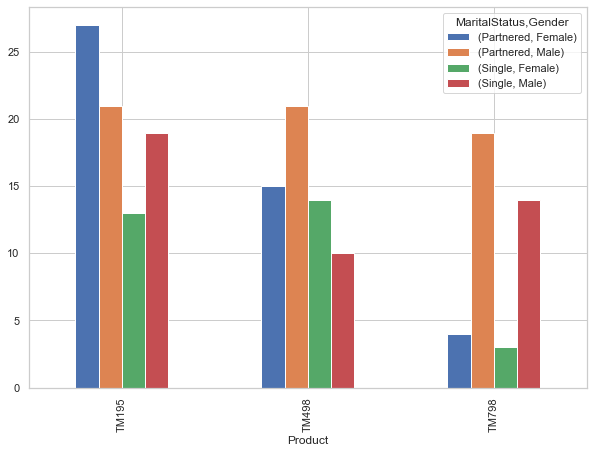

In [55]:
prd_mar_gen.plot(kind='bar',figsize=(10,7))

Observations :

- Partnered Male customers bought TM798 model more than Single Male customers
- There are more single males buying Treadmill than single Females
- Single Male customers bought TM195 Model compared to Single Female
- Majority of people who buy the TM798 are man & partnered

In [56]:
prod_gen_fit=pd.crosstab(index=data['Product'],columns=[data['Gender'],data['Fitness']])
prod_gen_fit

Gender  Female               Male              
Fitness      1   2   3  4  5    1  2   3  4   5
Product                                        
TM195        0  10  26  3  1    1  4  28  6   1
TM498        1   6  18  4  0    0  6  21  4   0
TM798        0   0   1  1  5    0  0   3  6  24

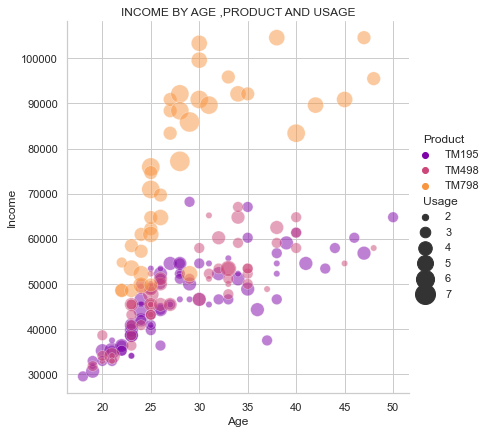

In [57]:
#scatter plot between income, age ,product and usage
sns.relplot(x="Age", y="Income", hue="Product", size="Usage",
            sizes=(40, 400), alpha=.5, palette="plasma",
            height=6, data=data).set(title='INCOME BY AGE ,PRODUCT AND USAGE');

Observations:

- Products TM195 and TM498 are bought by people with less than 70K as income and age is concentrated more in range of 23-35
- Product TM798 is mainly bought by people with higher than 70K income and age is between 23-30. 
- Majority of people who buys the TM798 expect that they will run more than consumers of the other two products, on average.

# Conclusion

Important Observations :
- 44.4% customers bought TM195. TM195 model is the most purchased model, followed by TM498 model and TM798 model.
- 57.8% male bought Treadmill. There are more Male customers than Female customers.
- 59.4% of the customers who purchased treadmill are partnered.
- Average Usage of Males is more than Average usage of Females.
- Customers buying treadmill are younger and average age of customer is 28, median is 26 and mode is 25
- Most of the customers are in lower pay range and earn less than 70K.

Customer Profiles of Each Models:

TM195

- Average customer income is 46K
- Customers who bought this treadmill have income less than 60k with an average of 55K.
- Average age of customer who purchases TM195 is 28.5, Median is 26.
- Average years of Education of customers is 15, and median is 16 assuming it to be bachelors.
- Self-rated fitness level of customer is average.
- They expect to use treadmill 3-4 times a week.

Majority of people whose income is around 55K has purchased this model because of its affordable price. Equal amount of males and females bought this model suggesting this model is not gender specific. Customer who bought this treadmill believes their fitness is average, and might be looking for a basic treadmill that does the job.

TM498

- Customers with lower income purchase TM195 and TM498 model may be because of cost of the Treadmill
- Average age of customer who purchases TM498 is 28.9 , Median is 26 . Customer range is between 24-33.
- Average years of Education of customers is 16 assuming it to be bachelor's

Sale was 33%.This was the 2nd most sold model. The income of this group is almost same as TM195 model. TM498 model expecting to use Treadmill less frequently but to run more kilometres a week.Single Female customers bought TM498 model more than Single male customers, may be cause of some feature difference.

TM798

- Average age of customer who purchases TM798 is 29 , Median is 27 . There are some outliers , suggesting we need explore more closely customers who are above 40 for any possibility of new customers.
- Average Education is 17 and median is 18, suggest they have some advanced education
- Expected usage is 4-5 day a week
- Expected Kilometres to run is on an Average 267 kilometres per week and median is 257.
- Average Income is 75K and median is 76K
- Product made only 22 % of sales.

This treadmill seems to be more popular with customer having high income and Partnered Male customer .This may be more expensive compared to other two models. Treadmill may have some advanced features and people with high income are ready to spend more money to buy this model.Male customers who are more serious about fitness or Professionals buy this model.Customer's self-rated fitness is between 3 -5 and expected usage is more than 4 days, suggest they have been working out and might be looking for a upgrade from there existing treadmill model.

Data-driven actions to take:

- TM195 & TM498 attracts people with income less than 60k , may be because of cost of both models. We should market these models as a budget Treadmill for all.
- TM798 should be marketed as a high end Treadmill for professionals and athletes. Create a luxiurous brand image for this Treadmill.
- Assuming TM 798 provides high margin of profit, we should brand it as Treadmill for athletes. We can also endorse some athlete to promote this Treadmill. This might increase there sales.
- Considering above observations, We can attract customers to upgrade from their existing treadmill and switch to TM798 ,highlighting extra features this Treadmill provides.
- To expand our sales with Female customers, We could run a marketing campaign during Women's days, Mothers days emphasizing on fitness and health.
- The age of our customers are in the range of 35 years old and 18 years old. We need to research if there is any scope to increase sale with customers who are more than 35 years old.